Dataset pelatihan berhasil dimuat.
Scaler berhasil disimpan.

Model SVM terbaik berhasil disimpan.

             HASIL PELATIHAN MODEL SVM
Hyperparameter Terbaik: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
--------------------------------------------------
Performa Model pada Data Uji:
  Akurasi (Accuracy)  : 0.9406
  F1-Score            : 0.9406
  Recall              : 0.9406
  Precision           : 0.9407


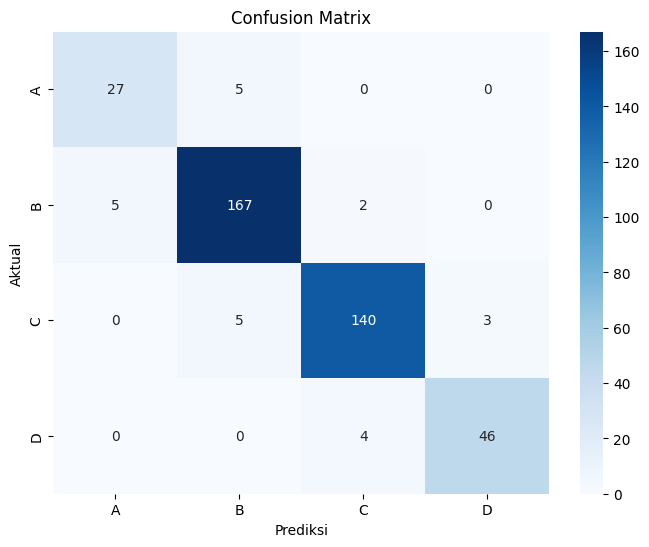

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import joblib

# Matplotlib settings for displaying plots inline in Jupyter
%matplotlib inline

# Suppress warnings
warnings.filterwarnings("ignore")

# 1. Muat dataset pelatihan dari file 'dataset_training.csv'
df_train = pd.read_csv('dataset_training.csv')
print("Dataset pelatihan berhasil dimuat.")

# 2. Pra-pemrosesan Data
features = ['calories', 'proteins', 'fat', 'carbohydrate']
target = 'Food Score'

# Mengisi nilai yang hilang dengan 0
df_train = df_train.fillna(0)

# Encode target labels into numeric format (e.g., 'A' -> 0, 'B' -> 1, etc.)
label_encoder = preprocessing.LabelEncoder()
df_train[target] = label_encoder.fit_transform(df_train[target])

# Define feature and target arrays
X = df_train[features]
y = df_train[target]

# 3. Menskalakan Data dan Menyimpan Scaler
PredictorScaler = StandardScaler()
X_scaled = PredictorScaler.fit_transform(X)

# Simpan scaler untuk digunakan pada prediksi di masa depan
joblib.dump(PredictorScaler, 'scaler.joblib')
print("Scaler berhasil disimpan.")

# 4. Melatih Model SVM dengan Hyperparameter Tuning
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Tuning dengan GridSearchCV untuk menemukan hyperparameter terbaik
grid = GridSearchCV(SVC(), param_grid, refit=True)

# Fit the model
grid.fit(X_train, y_train)

# Simpan model terbaik yang ditemukan oleh GridSearchCV
svm_model_tuned = grid.best_estimator_
joblib.dump(svm_model_tuned, 'svm_model_linear.joblib')
print("\nModel SVM terbaik berhasil disimpan.")

# 5. Evaluasi Model dan Menampilkan Output yang Rapi
svm_predictions = svm_model_tuned.predict(X_test)

# Metrik evaluasi
accuracy = accuracy_score(y_test, svm_predictions)
f1 = f1_score(y_test, svm_predictions, average='weighted')
recall = recall_score(y_test, svm_predictions, average='weighted')
precision = precision_score(y_test, svm_predictions, average='weighted')

# Output yang rapi untuk laporan
print("\n" + "="*50)
print("             HASIL PELATIHAN MODEL SVM")
print("="*50)
print(f"Hyperparameter Terbaik: {grid.best_params_}")
print("-" * 50)
print("Performa Model pada Data Uji:")
print(f"  Akurasi (Accuracy)  : {accuracy:.4f}")
print(f"  F1-Score            : {f1:.4f}")
print(f"  Recall              : {recall:.4f}")
print(f"  Precision           : {precision:.4f}")
print("="*50)

# 6. Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, svm_predictions)

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()
